**Name:** Vishnu Vardhan G V S <br>
**ID:** 202411071 <br>
**Company:** Adani AI Labs

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [11]:
data = pd.read_csv('/content/Predicting Energy Consumption.csv')
data

,Start time UTC,End time UTC,Electricity consumption (MWh)
0,31-12-2015 21:00,31-12-2015 22:00,10800
1,31-12-2015 22:00,31-12-2015 23:00,10431
2,31-12-2015 23:00,01-01-2016 00:00,10005
3,01-01-2016 00:00,01-01-2016 01:00,9722
4,01-01-2016 01:00,01-01-2016 02:00,9599
...,...,...,...
52961,31-12-2021 16:00,31-12-2021 17:00,11447
52962,31-12-2021 17:00,31-12-2021 18:00,11237
52963,31-12-2021 18:00,31-12-2021 19:00,10914
52964,31-12-2021 19:00,31-12-2021 20:00,10599


In [12]:
data['Start time UTC'] = pd.to_datetime(
    data['Start time UTC'], dayfirst=True, errors='coerce'
)

data['End time UTC'] = pd.to_datetime(
    data['End time UTC'], dayfirst=True, errors='coerce'
)

In [14]:
print(data.duplicated().sum())
print(data.isna().sum())
print(data.info())
print(data.describe())

0
Start time UTC                   0
End time UTC                     0
Electricity consumption (MWh)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Start time UTC                 52966 non-null  datetime64[ns]
 1   End time UTC                   52966 non-null  datetime64[ns]
 2   Electricity consumption (MWh)  52966 non-null  int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 1.2 MB
None
                      Start time UTC                   End time UTC  \
count                          52966                          52966   
mean   2019-01-02 10:40:13.831514624  2019-01-02 11:40:13.831514368   
min              2015-12-31 21:00:00            2015-12-31 22:00:00   
25%              2017-07-04 22:15:00            2017-07-04 23:15:00   
50%              201

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


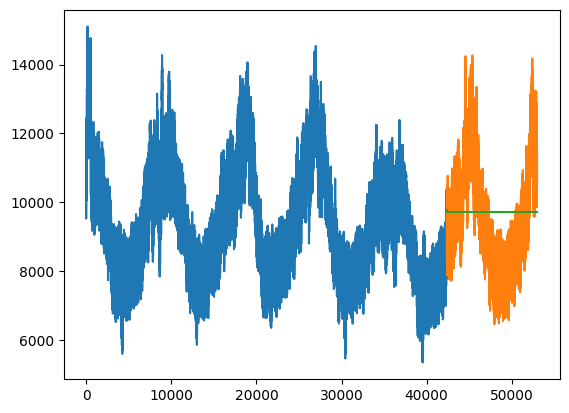

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     Electricity consumption (MWh)   No. Observations:                42372
Model:                            ARIMA(2, 1, 2)   Log Likelihood             -283252.438
Date:                           Fri, 16 Jan 2026   AIC                         566514.876
Time:                                   08:47:38   BIC                         566558.147
Sample:                                        0   HQIC                        566528.536
                                         - 42372                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1104      0.091      1.211      0.226      -0.068       0.289
ar.L2          0.1979      0.037      5.404      0.000       0.126       0.270
ma.L1          0.5931      0.091      6.494      0.000       0.414       0.772
ma.L2          0.0115      0.030      0.387      0.699      -0.047       0.070
sigma2       3.75e+04    192.931    194.353      0.000    3.71e+04    3.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6480.25
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
ts = data['Electricity consumption (MWh)']

# Train-test split
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot
plt.figure()
plt.plot(train)
plt.plot(test)
plt.plot(forecast)
plt.show()

model_fit.summary()

In [22]:
# Error metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("MAE  :", mae)
print("RMSE :", rmse)

MAE  : 1285.7740605338158
RMSE : 1570.1183857380126
